In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cm_modules import paths

/home/alexandra/anaconda3/envs/microbe/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load dataset
# Dataset is of the form sample x taxon
# Each column is a bacterial taxon, and each row is a single sample.
# Rows are named using the format "${PROJECT_ID}_${SAMPLE_ID}"
# Each cell is a read count.
# There are ~11,800 samples in the preliminary dataset.

microbiome_data_filename = paths.RAW_MICROBIOME_DATA
microbiome_data = pd.read_csv(microbiome_data_filename, sep="\t", index_col=0, header=0)

In [3]:
print(microbiome_data.shape)
microbiome_data.head()

(11857, 1232)


,Bacteria Actinobacteriota Actinobacteria Bifidobacteriales Bifidobacteriaceae Bifidobacterium,Bacteria Bacteroidota Bacteroidia Bacteroidales Bacteroidaceae Bacteroides,Bacteria Actinobacteriota Coriobacteriia Coriobacteriales Coriobacteriaceae Collinsella,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Agathobacter,Bacteria Firmicutes Negativicutes Veillonellales-Selenomonadales Selenomonadaceae Megamonas,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Blautia,Bacteria Firmicutes Clostridia Oscillospirales Ruminococcaceae Faecalibacterium,Bacteria Firmicutes Clostridia Lachnospirales Lachnospiraceae Anaerostipes,Bacteria Bacteroidota Bacteroidia Bacteroidales Prevotellaceae Prevotella,Bacteria Firmicutes Bacilli Lactobacillales Streptococcaceae Streptococcus,...,Bacteria Actinobacteriota Acidimicrobiia Microtrichales Ilumatobacteraceae NA,Bacteria Verrucomicrobiota Verrucomicrobiae Pedosphaerales Pedosphaeraceae ADurb.Bin063-1,Bacteria Proteobacteria Alphaproteobacteria Caulobacterales Caulobacteraceae PMMR1,Bacteria Bacteroidota Bacteroidia Flavobacteriales Cryomorphaceae NA,Bacteria Bacteroidota Bacteroidia Flavobacteriales Flavobacteriaceae Pseudofulvibacter,Bacteria Proteobacteria Alphaproteobacteria Rickettsiales Rickettsiaceae NA,Bacteria Bacteroidota Bacteroidia Flavobacteriales Flavobacteriaceae Gelidibacter,Bacteria Proteobacteria Gammaproteobacteria Burkholderiales Comamonadaceae Ideonella,Bacteria Proteobacteria Alphaproteobacteria Rhizobiales Xanthobacteraceae Rhodoplanes,Bacteria Proteobacteria Alphaproteobacteria Sphingomonadales Sphingomonadaceae Rhizorhapis
PRJDB5310_DRR077057,311,423,0,0,0,0,429,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRJDB5310_DRR077058,243,313,0,0,0,13,239,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRJDB5310_DRR077059,0,255,0,196,0,477,297,51,0,0,...,0,0,0,0,0,0,0,0,0,0
PRJDB5310_DRR077060,698,0,167,159,0,158,151,23,0,127,...,0,0,0,0,0,0,0,0,0,0
PRJDB5310_DRR077061,39,335,64,96,61,189,104,68,0,23,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# How sparse is this data matrix?
# How many 0s across the entire matrix?
num_zeros = (microbiome_data == 0).sum().sum()
total = microbiome_data.shape[0] * microbiome_data.shape[1]
num_zeros / total

0.9784085569486598

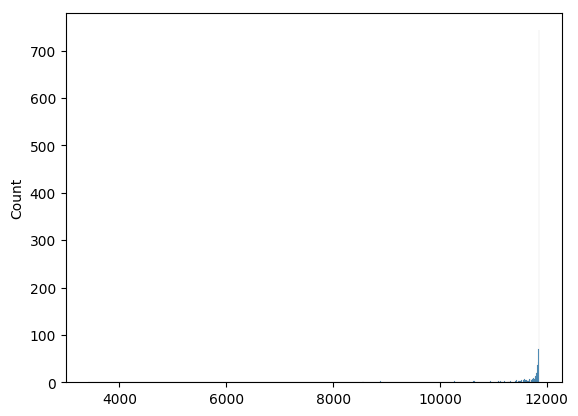

Text(0.5, 1.0, "Distribution of 0's per taxa")

In [6]:
# Number of 0's per taxon
zero_per_taxon = sns.histplot((microbiome_data == 0).sum())
plt.show(zero_per_taxon)
plt.ylabel("Count")
plt.xlabel("Number of 0's per taxon")
plt.title("Distribution of 0's per taxon")

In [7]:
# Plot distribution of abundances per taxon
boxplot = np.log10(1 + microbiome_data.sample(n=10, axis="columns")).boxplot(
    rot=90, fontsize=15
)

/home/alexandra/anaconda3/envs/microbe/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


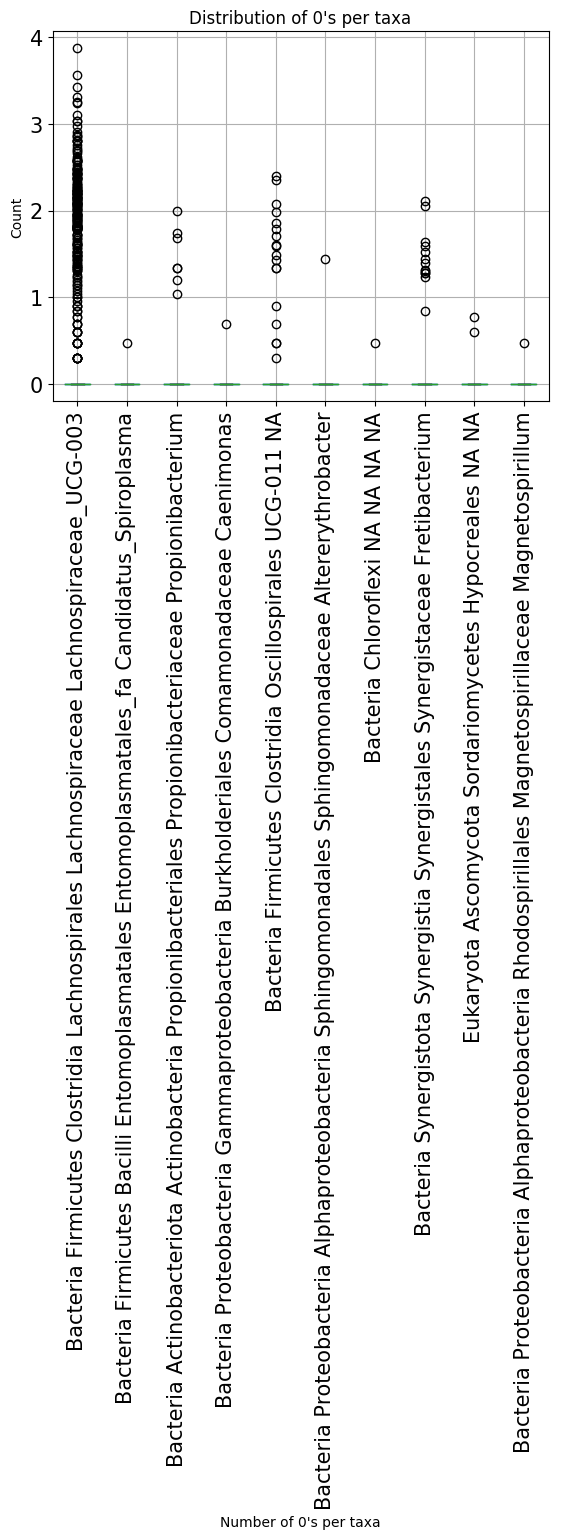

Text(0.5, 1.0, 'log10 abundance per taxa')

In [8]:
plt.show(boxplot)
plt.ylabel("log10 abundance")
plt.xlabel("Random set of 10 taxon")
plt.title("log10 abundance per taxon")

**Takeaway**:

Overall we can see that our input data is _very_ sparse. Most taxa only found in a small subset of samples. We will need to modify our VAE model to account for this sparsity.